In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_notebook, show
%matplotlib inline

## Read in Data

In [11]:
df = pd.read_csv('Data/cleaned_vehicles_df.csv', index_col = 0)
df.head()

,posting_year,year_manufactured,manufacturer,model,state,region,price,fuel,miles,cylinders,title_status,transmission,drive,type,paint_color
0,2021,2014,gmc,sierra 1500 crew cab slt,al,auburn,33590,gas,57923.0,8 cylinders,clean,other,NaN,pickup,white
1,2021,2010,chevrolet,silverado 1500,al,auburn,22590,gas,71229.0,8 cylinders,clean,other,NaN,pickup,blue
2,2021,2020,chevrolet,silverado 1500 crew,al,auburn,39590,gas,19160.0,8 cylinders,clean,other,NaN,pickup,red
3,2021,2017,toyota,tundra double cab sr,al,auburn,30990,gas,41124.0,8 cylinders,clean,other,NaN,pickup,red
4,2021,2013,ford,f-150 xlt,al,auburn,15000,gas,128000.0,6 cylinders,clean,automatic,rwd,truck,black


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399883 entries, 0 to 399882
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   posting_year       399883 non-null  int64  
 1   year_manufactured  399883 non-null  int64  
 2   manufacturer       399883 non-null  object 
 3   model              399883 non-null  object 
 4   state              399883 non-null  object 
 5   region             399883 non-null  object 
 6   price              399883 non-null  int64  
 7   fuel               397874 non-null  object 
 8   miles              399883 non-null  float64
 9   cylinders          235585 non-null  object 
 10  title_status       392710 non-null  object 
 11  transmission       398275 non-null  object 
 12  drive              280317 non-null  object 
 13  type               316647 non-null  object 
 14  paint_color        280565 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 48.8+ 

In [13]:
df.describe()

,posting_year,year_manufactured,price,miles
count,399883.0,399883.000000,3.998830e+05,3.998830e+05
mean,2021.0,2011.650113,6.273112e+04,9.617087e+04
std,0.0,8.575114,1.130055e+07,1.898250e+05
min,2021.0,1900.000000,0.000000e+00,0.000000e+00
25%,2021.0,2009.000000,5.995000e+03,3.819350e+04
50%,2021.0,2014.000000,1.399500e+04,8.573900e+04
75%,2021.0,2017.000000,2.659000e+04,1.330080e+05
max,2021.0,2022.000000,3.736929e+09,1.000000e+07


## Correlations

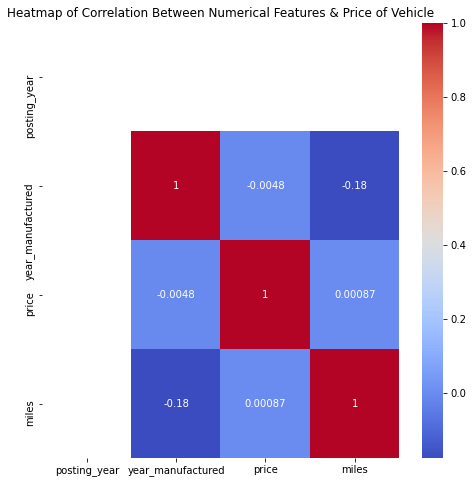

In [15]:
# set up figure size
fig, ax = plt.subplots(figsize=(8, 8))

# set up correlation matrix
corr = df.corr(numeric_only = True)

sns.heatmap(corr, cmap = 'coolwarm', annot = True)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Numerical Features & Price of Vehicle");

plt.show()

## Distribution of Features

In [16]:
# get categorical columns
cat_cols = df.select_dtypes(include = ['object']).columns

cat = list(cat_cols)

# Remove model and region (too many)
cat.remove('model')
cat.remove('region')

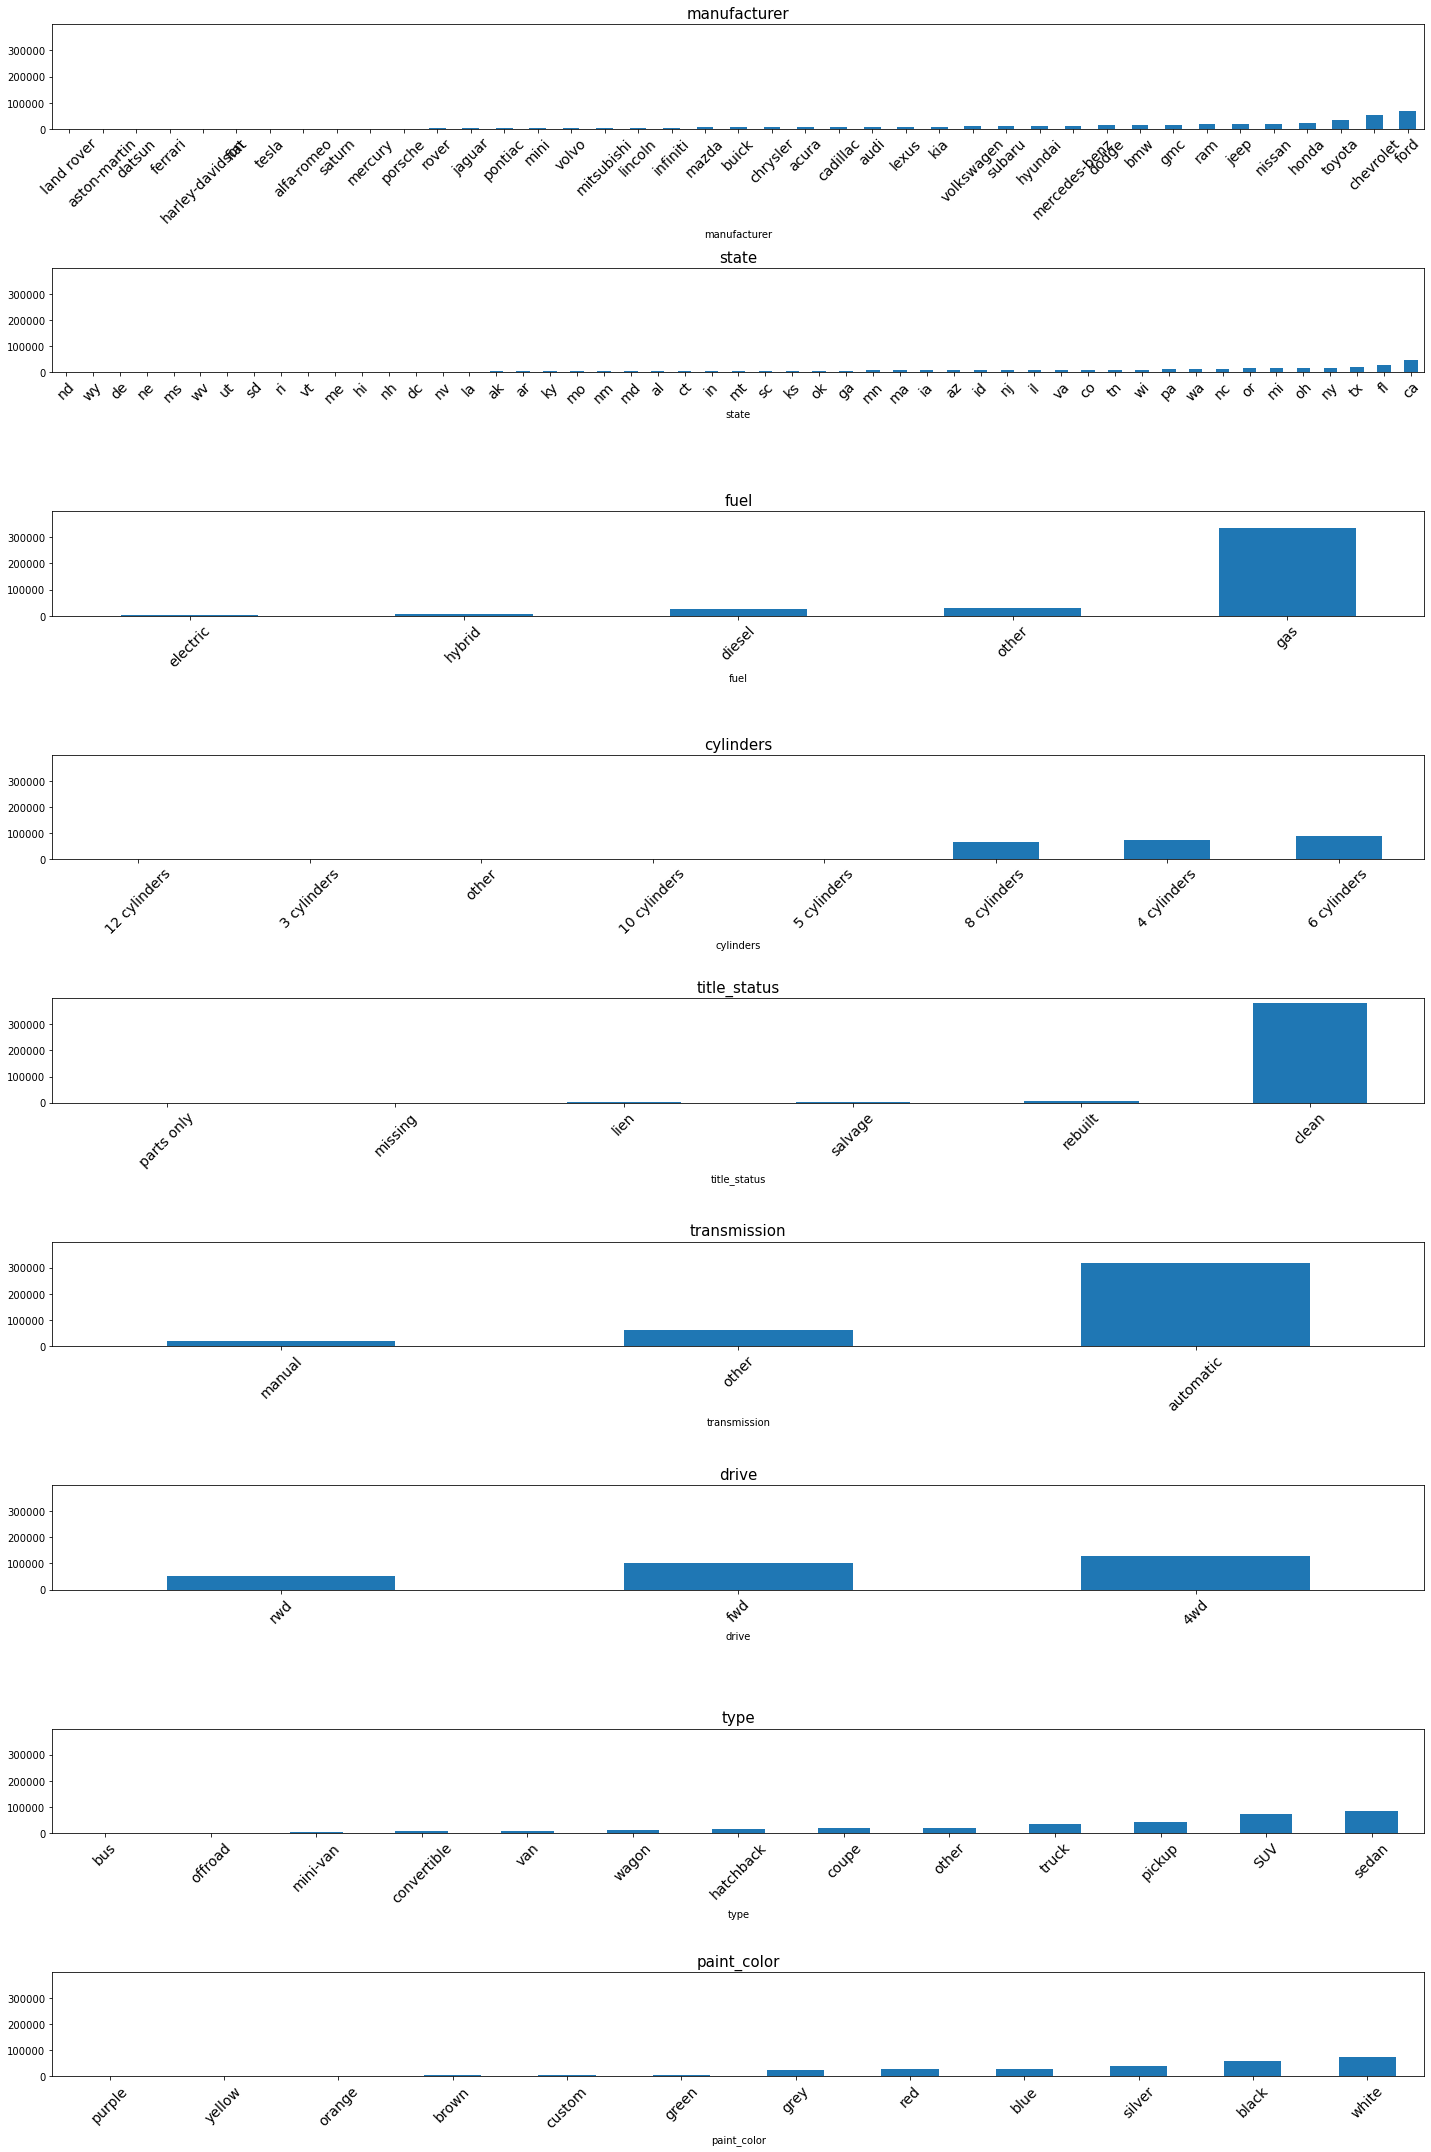

In [48]:
fig, axes = plt.subplots(nrows=len(cat), ncols=1, figsize=(20,30), sharey=True)


for col, ax in zip(cat, axes.flatten()):
    (df.groupby(col)         # group values together by column of interest
       .count()['price']   # take the mean of the price for each group
       .sort_values()              # sort the groups in ascending order
       .plot
       .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col, fontsize = 15)                # Make the title the name of the column
    
    # Adjust x-axis tick labels
    ax.tick_params(axis='x', labelsize=14, rotation = 45)  # set size of x-axis labels
    
fig.tight_layout()

In [31]:
num_cols = df.select_dtypes(include = ['int', 'float64']).columns

In [36]:
df[num_cols]

,posting_year,year_manufactured,price,miles
0,2021,2014,33590,57923.0
1,2021,2010,22590,71229.0
2,2021,2020,39590,19160.0
3,2021,2017,30990,41124.0
4,2021,2013,15000,128000.0
...,...,...,...,...
399878,2021,2019,23590,32226.0
399879,2021,2020,30590,12029.0
399880,2021,2020,34990,4174.0
399881,2021,2018,28990,30112.0


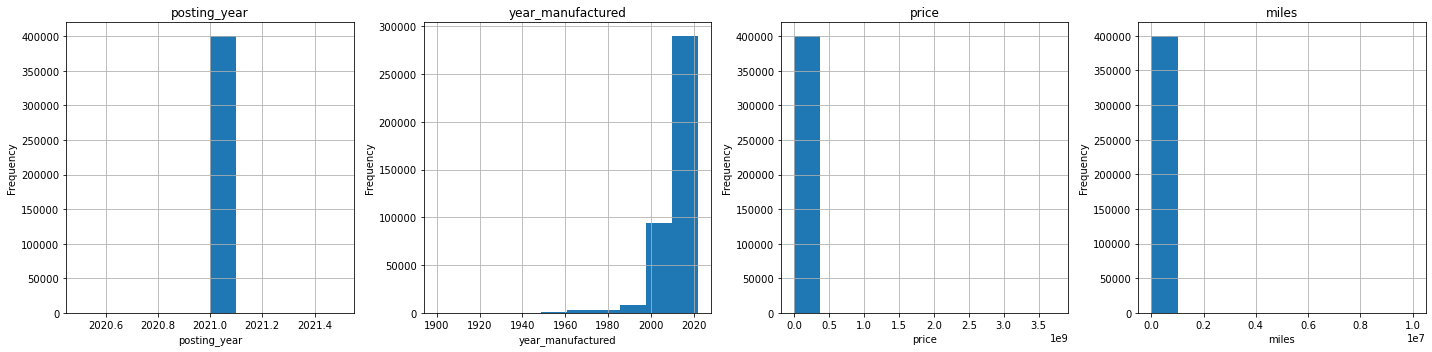

In [40]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int', 'float64']).columns

# Fill missing values with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Plot histograms of numerical features
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(20, 5))  # Adjust figsize as needed

for i, col in enumerate(num_cols):
    df[col].hist(ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Ensure tight layout for better visualization
plt.show()